In [3]:
# imports
import torch
import torch.nn as nn
import torch.nn.functional as F 

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as pyplot
import math

from collections import OrderedDict

print("the pytorch version is {}".format(torch.__version__))
print("the torchvision version is {}".format(torchvision.__version__))

the pytorch version is 1.6.0
the torchvision version is 0.7.0


In [4]:
# get the train set
train_set = torchvision.datasets.FashionMNIST(
    root = '/home/javaprog/Data/Personal/Scratch',
    train = True,
    download = True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw/train-images-idx3-ubyte.gz
26427392it [00:03, 8411451.34it/s]
Extracting /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw
0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw/train-labels-idx1-ubyte.gz
32768it [00:00, 101093.51it/s]
0it [00:00, ?it/s]Extracting /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw
4423680it [00:01, 3890946.54it/s]
0it [00:00, ?it/s]Extracting /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/javaprog/Data/Personal/Scratch/FashionMNIST/raw
8192it [00:00, 318

In [6]:
# get the test data
image, label = train_set[0]
print("the image shape is {}".format(image.shape))

the image shape is torch.Size([1, 28, 28])


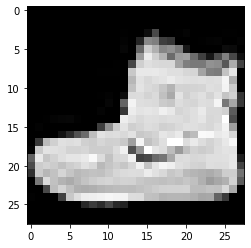

In [7]:
# display the image
pyplot.imshow(image.squeeze(), cmap='gray')

In [8]:
# print the labels
print("the labels are {}".format(train_set.classes))

the labels are ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
# set the network layer sizes
in_features = image.numel()
hidden_layer1 = math.floor(in_features/2)               # always have less features going down dense/linear layers
out_features = len(train_set.classes)

# print
print("the input layer is of size {}".format(in_features))
print("the hidden layer 1 is of size {}".format(hidden_layer1))
print("the output layer is of size {}".format(out_features))

the input layer is of size 784
the hidden layer 1 is of size 392
the output layer is of size 10


In [18]:
# build the layer architecture
layers = OrderedDict([
    ('input_flatten', nn.Flatten(start_dim=1)),
    ('hidden_linear_01', nn.Linear(in_features, hidden_layer1)),
    ('output_linear', nn.Linear(hidden_layer1, out_features))
])

# build the model
model = nn.Sequential(layers)

# print the model
print("the model is \n{}".format(model))
print("the hidden layer of the model is {}".format(model.hidden_linear_01))


the model is 
Sequential(
  (input_flatten): Flatten()
  (hidden_linear_01): Linear(in_features=784, out_features=392, bias=True)
  (output_linear): Linear(in_features=392, out_features=10, bias=True)
)
the hidden layer of the model is Linear(in_features=784, out_features=392, bias=True)


In [19]:
# test the network
# add a dimension to the image
image = image.unsqueeze(0)
print("the new shape of the image is {}".format(image.shape))

the new shape of the image is torch.Size([1, 1, 1, 28, 28])


In [20]:
# feed the image to the network model
prediction = model(image)
print("the prediction is \n{}".format(prediction))


the prediction is 
tensor([[-0.0610, -0.0483, -0.4234, -0.1393, -0.1305,  0.1017,  0.0623,  0.1383,
         -0.0785, -0.0247]], grad_fn=<AddmmBackward>)
